In [1]:
# 깃헙 개인 레포지토리 업로드 : .ipynb파일 + 발표ppt
# 드롭박스 제출 : 모든 자료


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import seaborn as sns
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from scipy import stats

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# 한글폰트 사용 in colab
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

Selecting previously unselected package fonts-nanum.
(Reading database ... 155639 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
NanumBarunGothic


In [6]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [7]:
vgames2_unclean = pd.read_csv('vgames2.csv')

In [8]:
vgames2_unclean.drop(['Unnamed: 0'], axis = 1, inplace = True)
df = vgames2_unclean.copy()

##1. 시각적 탐색

In [9]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [10]:
  df.sample(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
13343,Dance Dance Revolution Ultramix 2,XB,2004.0,Simulation,Konami Digital Entertainment,0.32,0.09,0,0.02
3869,R-Type III: The Third Lightning,GBA,2004.0,Shooter,Zoo Digital Publishing,0.02,0.01,0,0
14260,R4: Ridge Racer Type 4,PS,1998.0,Racing,Namco Bandai Games,0.68,0.46,0.79,0.13
7994,Soccer Tsuku DS: World Challenge 2010,DS,2010.0,Sports,Sega,0,0,0.13,0
1541,Final Fantasy Type-0,XOne,2015.0,Role-Playing,Square Enix,0.15,0.07,0,0.02
6466,Juiced,PS2,2005.0,Racing,THQ,0.26,0.2,0,0.07
218,Company of Heroes,PC,2006.0,Strategy,THQ,0,0.04,0,0.01
5351,IGT Slots: Lucky Larry's Lobstermania,PC,2011.0,Simulation,Masque Publishing,0.01,0,0,0
11827,FlatOut 2,PS2,2006.0,Racing,Empire Interactive,0.08,0.06,0,0.02
2096,Monster 4x4: Masters of Metal,PS2,2003.0,Racing,Ubisoft,0.14,0.11,0,0.04


In [11]:
df[df['Year'] < 100]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
74,Age of Empires III: Complete Collection,PC,9.0,Strategy,Microsoft Game Studios,0.01,0.12,0,0.03
81,Treasures of the Deep,PS,97.0,Action,Namco Bandai Games,0.1,0.07,0,0.01
213,NASCAR Unleashed,PS3,11.0,Racing,Activision,0.09,0,0,0.01
304,Kung Fu Panda: Showdown of Legendary Legends,PS3,15.0,Action,Little Orbit,0,0.02,0,0
768,NASCAR Thunder 2004,PS2,3.0,Racing,Electronic Arts,0.53,0.41,0,0.14
...,...,...,...,...,...,...,...,...,...
15985,Sugoi Hebereke,SNES,94.0,Fighting,Sunsoft,0,0,0.02,0
16103,Fab 5 Soccer,DS,8.0,Sports,Destineer,0.01,0,0,0
16149,Dragon Ball Z: Burst Limit,X360,8.0,Fighting,Atari,0.24,0.18,0.03,0.05
16394,Point Blank 3,PS,0.0,Shooter,Namco Bandai Games,0.01,0.01,0,0


year : 데이터 타입이 integer이어야 하지만 소수점을 가진 float으로 확인된다. <br>
NA_Sales / EU_Sales / JP_Sales / Other_Sales : 연간 출고량을 나타내는 데이터 값이  소수점을 가진 float으로 확인된다. <br>
출고량을 나타내는 데이터 값에 숫자가 아닌 영문이 포함되어 있다. 

##2. 프로그래매틱 탐색 및 데이터 정제

In [12]:
df.shape

(16598, 9)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [14]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

###a. 결측치 확인
year, Genre, Publisher 컬럼값에 결측치가 존재함을 확인. <br>
각 변수별 결측치의 비율을 구해본 결과 전체 데이터의 2% 미만이므로 삭제하도록 한다.<br>

In [15]:
#결측치 비율 확인하기 
df.isnull().sum() / len(df) * 100

Name           0.000000
Platform       0.000000
Year           1.632727
Genre          0.301241
Publisher      0.349440
NA_Sales       0.000000
EU_Sales       0.000000
JP_Sales       0.000000
Other_Sales    0.000000
dtype: float64

In [16]:
df.dropna(axis = 0, inplace = True)

In [17]:
df.shape

(16241, 9)

###b. 중복값 확인 

In [18]:
df.duplicated().sum()

0

###C. 오류 데이터 수정

###1) Year

In [19]:
df['Year'] = df['Year'].astype('int')

In [20]:
df['Year'].describe()

count    16241.000000
mean      1994.178437
std        155.484265
min          0.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2020.000000
Name: Year, dtype: float64

In [21]:
df['Year'].unique()  #오류값 발견 

array([2008, 2009, 2010, 2005, 2011, 2007, 2001, 2003, 2006, 2014, 2015,
       2002, 1997, 2013, 1996, 2004, 2000, 1984, 1998, 2016, 1985, 1999,
          9,   97, 1995, 1993, 2012, 1987, 1982,   11, 1994, 1990,   15,
       1992, 1991, 1983, 1988, 1981,    3, 1989,   96,    6,    8, 1986,
          1,    5,    4,   10,   98,    7,   16,   86,   14,   95, 2017,
       1980, 2020,    2,   13,    0,   12,   94])

In [22]:
df = df.drop(index = df[df['Year'] <= 9].index)  #0~9 삭제 
df[df['Year'] <= 9]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


In [23]:
df = df.drop(index = df[df['Year'] <= 9].index)  #0~9 삭제 

convert = df['Year']
def convert(x):   # yyyy으로 변경 
  if x <= 20:
    x = 2000 + x
  elif x <= 99:
    x = 1900 + x
  return x
df['Year'] = df['Year'].apply(convert)

In [24]:
df['Year'] = df['Year'].astype('int')

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


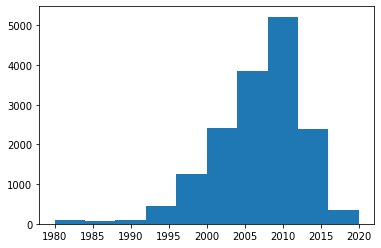

In [25]:
plt.hist(df['Year']);

###2) Sales

In [26]:
# NA_Sales에 섞여 있는 오류 데이터를 확인
import re
def has_errors(inputstr):
  return bool(re.search('[a-zA-Z]', inputstr))
  
error_condition_1 =df.NA_Sales.apply(has_errors)
error_NA = df[error_condition_1]
error_NA

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
10,Ford Racing,PS,2001,Racing,Empire Interactive,480K,0.33M,0K,0.06
45,Resident Evil: Revelations 2,PS3,2015,Action,Capcom,60K,0.08,0.16,0.03
145,TOCA Race Driver 3,PC,2006,Racing,Codemasters,0K,0.02,0,0
447,Medal of Honor: Warfighter,X360,2012,Action,Electronic Arts,0.58M,0.47,0.01,0.1
458,F1 2010,PS3,2010,Racing,Codemasters,0.25M,0.76,0.08,0.27
...,...,...,...,...,...,...,...,...,...
16330,Midway Arcade Treasures,PS2,2003,Misc,Midway Games,720K,0.56,0,0.19
16408,NASCAR 06: Total Team Control,PS2,2005,Racing,Electronic Arts,0.53M,0.02,0,0.09
16482,Super Robot Taisen F Kanketsuhen,SAT,1998,Strategy,Banpresto,0M,0,0.55,0
16492,Mortal Kombat,PSV,2012,Fighting,Warner Bros. Interactive Entertainment,470K,0.18,0,0.12


In [27]:
error_Sales = df.iloc[:, 5:]
error_Sales.dtypes

NA_Sales       object
EU_Sales       object
JP_Sales       object
Other_Sales    object
dtype: object

In [28]:
#출고량과 관련있는 컬럼의  M, K 처리
#기본단위의 경우 M, K가 천장과 백만장을 놓고 보았을 대 연간 출고량이라면 백만 장일 것으로 추론함. (단위설정에 대한 타당성 필요! )

def error_Sales(x):
  if 'K' in x:
    x = x[:len(x)-1]
    x = float(x) * 1000
  elif 'M' in x:
    x = x[:len(x)-1]
    x = float(x) * 1000000
  else:
    x = float(x) * 1000000
  return x

for i in ['NA_Sales', 'EU_Sales',	'JP_Sales', 'Other_Sales']:
  df[i] = df[i].apply(error_Sales)

In [29]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000.0,0.0,0.0,0.0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000.0,0.0,0.0,10000.0
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0.0,0.0,20000.0,0.0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000.0,0.0,0.0,0.0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000.0,90000.0,0.0,40000.0


###e. 이상치 제거하기 

###**1) NA_Sales**

In [30]:
# df['NA_Sales'].describe()

In [31]:
# plt.hist(df.NA_Sales);

In [32]:
# plt.hist(df.NA_Sales[df.NA_Sales < 10000000]);

In [33]:
# plt.hist(df.NA_Sales[df.NA_Sales < 4500000]);

In [34]:
# less_4500000 = df[df.NA_Sales < 4500000]
# larger_4500000 = df[df.NA_Sales >= 4500000]

# len(less_4500000), len(larger_4500000)

In [35]:
# len(larger_4500000) / len(less_4500000)

In [36]:
# df.drop(index = df[df['NA_Sales'] >= 4500000].index, inplace = True)

###**2) EU_Sales**

In [37]:
# df['EU_Sales'].describe()

In [38]:
# plt.hist(df.EU_Sales);

In [39]:
# plt.hist(df.EU_Sales[df['EU_Sales'] < 2500000]);

In [40]:
# less_2500000 = df[df.EU_Sales < 2500000]
# larger_2500000 = df[df.EU_Sales >= 2500000]
# len(less_2500000), len(larger_2500000)

In [41]:
# len(larger_2500000) / len(less_2500000)

In [42]:
# df.drop(index = df[df['EU_Sales'] >= 2500000].index, inplace = True)

###**3**) JP_Sales 

In [43]:
# df['JP_Sales'].describe()

In [44]:
# plt.hist(df['JP_Sales']);

In [45]:
# plt.hist(df.JP_Sales[df['JP_Sales'] < 1600000]);

In [46]:
# less_1600000 = df[df.JP_Sales < 1600000]
# larger_1600000 = df[df.JP_Sales >= 1600000]
# len(less_1600000), len(larger_1600000)

In [47]:
# len(larger_1600000) / len(less_1600000)

In [48]:
# df.drop(index = df[df['JP_Sales'] >= 1600000].index, inplace = True)

In [49]:
# sns.boxplot(x=df.JP_Sales);  

###**4) Other_Sales**

In [50]:
# df['Other_Sales'].describe()

In [51]:
# plt.hist(df['Other_Sales']);

In [52]:
# plt.hist(df.Other_Sales[df['Other_Sales'] < 650000]);

In [53]:
# less_650000 = df[df.Other_Sales < 650000]
# larger_650000 = df[df.Other_Sales >= 650000]
# len(less_650000), len(larger_650000)

In [54]:
#  len(larger_650000) / len(less_650000)

In [55]:
# df.drop(index = df[df['Other_Sales'] >= 650000].index, inplace = True)

###f. 데이터 타입 변경하기

In [56]:
df = df.astype({'NA_Sales':'int', 'EU_Sales':'int', 'JP_Sales':'int', 'Other_Sales':'int'})
df.dtypes

Name           object
Platform       object
Year            int64
Genre          object
Publisher      object
NA_Sales        int64
EU_Sales        int64
JP_Sales        int64
Other_Sales     int64
dtype: object

In [57]:
# df.to_excel('C:\Users\wlstj\dataframe\game.xlsx')

##3. EDA

In [58]:
df

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006,Platform,Vivendi Games,150000,40000,0,10000
16594,Rainbow Islands: Revolution,PSP,2005,Action,Rising Star Games,10000,0,0,0
16595,NBA 2K16,PS3,2015,Sports,Take-Two Interactive,440000,190000,30000,130000
16596,Toukiden: The Age of Demons,PSV,2013,Action,Tecmo Koei,50000,50000,250000,30000


In [59]:
df['Name'].unique(), len(df['Name'].unique())

(array(["Candace Kane's Candy Factory", 'The Munchables',
        'Otome wa Oanesama Boku ni Koi Shiteru Portable', ...,
        'White Album: Tsuzurareru Fuyu no Omoide', 'Minna no Chizu 2',
        'Rainbow Islands: Revolution'], dtype=object), 11267)

In [60]:
a = df['Year'].sort_values(ascending = True)

In [61]:
a.unique(), len(a.unique())

(array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
        1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
        2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
        2013, 2014, 2015, 2016, 2017, 2020]), 39)

In [62]:
df['Platform'].unique(), len(df['Platform'].unique())

(array(['DS', 'Wii', 'PSP', 'PS3', 'PC', 'PS', 'GBA', 'PS4', 'PS2', 'XB',
        'X360', 'GC', '3DS', '2600', 'SAT', 'GB', 'NES', 'DC', 'N64',
        'XOne', 'SNES', 'WiiU', 'PSV', 'GEN', 'SCD', 'WS', 'NG', 'TG16',
        '3DO', 'GG', 'PCFX'], dtype=object), 31)

In [63]:
df['Genre'].unique(), len(df['Genre'].unique())

(array(['Action', 'Adventure', 'Misc', 'Platform', 'Sports', 'Simulation',
        'Racing', 'Role-Playing', 'Puzzle', 'Strategy', 'Fighting',
        'Shooter'], dtype=object), 12)

####a.지역별 게임 장르 총 판매량

지난 1980년부터 2020년까지(2018년, 2019년 제외) 세계에서 판매된 11144개의 게임을 대상으로 분석을 시행한다. <br>
게임 플랫폼은 31개이며 장르는 12개이다.

In [64]:
Sales = pd.DataFrame(round(df.groupby('Genre').mean())).iloc[:,1:]
Sales

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,264753.0,158522.0,48309.0,56797.0
Adventure,80403.0,50261.0,40956.0,13183.0
Fighting,264238.0,119712.0,104550.0,43337.0
Misc,235445.0,124101.0,62155.0,43325.0
Platform,511165.0,230185.0,150254.0,59008.0
Puzzle,215971.0,89911.0,100160.0,22121.0
Racing,291599.0,193133.0,46430.0,62869.0
Role-Playing,217732.0,125061.0,234180.0,38750.0
Shooter,450039.0,243297.0,29969.0,79812.0


In [65]:
#구글시트에서 line gragh
# Sales.to_csv('/content/drive/MyDrive/Data/Sales.csv')

In [66]:
NA = pd.DataFrame(round(df.groupby('Genre')['NA_Sales'].mean()))
NA = NA.sort_values('NA_Sales', ascending = True)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48513 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48120 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/bac

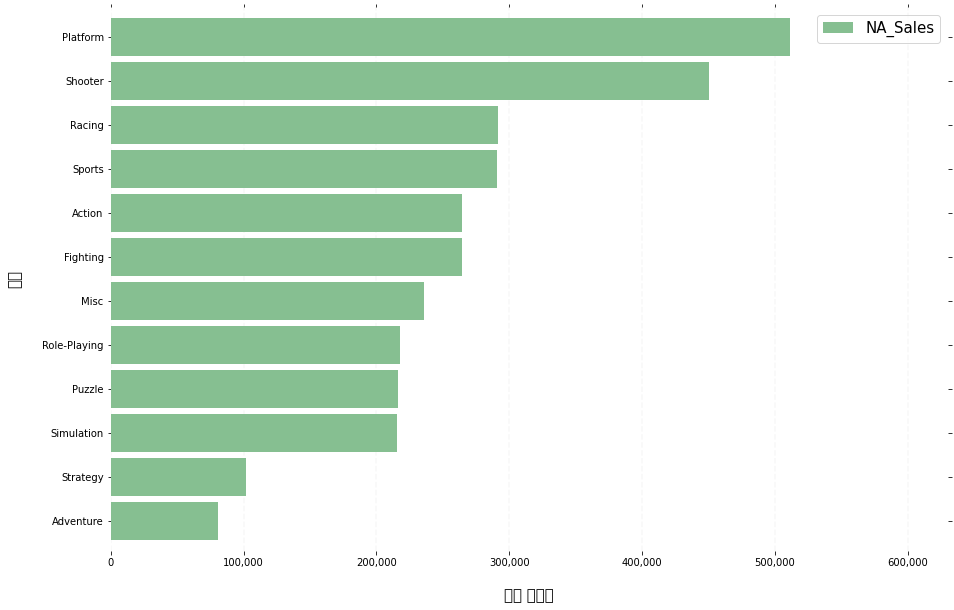

In [67]:
ax = NA.plot(kind='barh', figsize=(15, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel('북미 출하량', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Set y-axis label
ax.set_ylabel('장르', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'));

leg = ax.legend(prop={"size":15})


In [68]:
EU = pd.DataFrame(round(df.groupby('Genre')['EU_Sales'].mean()))
EU = EU.sort_values('EU_Sales', ascending = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47101 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 50976 missing from current font.
  font.set_

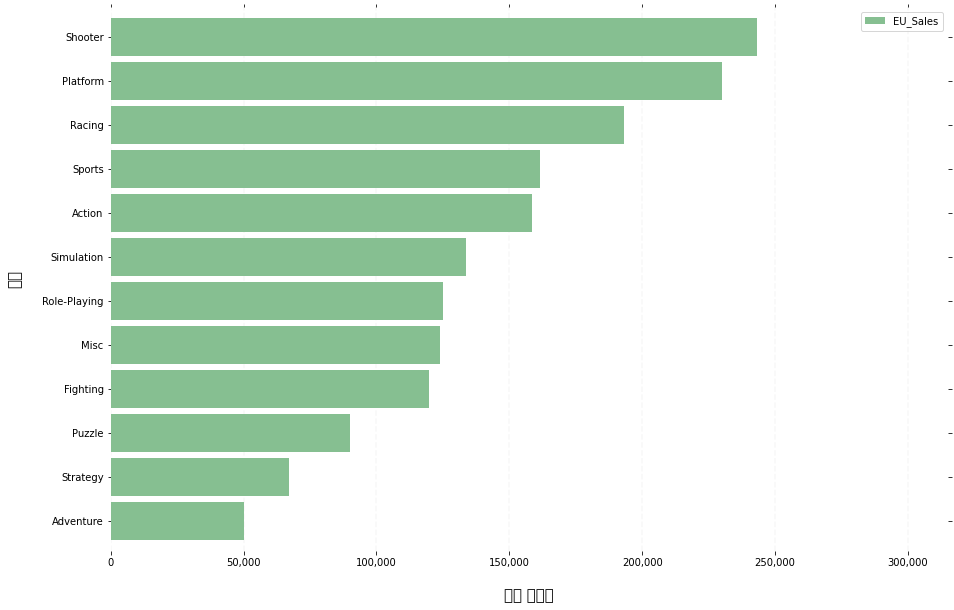

In [69]:
ax = EU.plot(kind='barh', figsize=(15, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel('유럽 출하량', labelpad=20, weight='normal', size=20, fontsize= 15)

  # Set y-axis label
ax.set_ylabel('장르', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'));

leg = ax.legend(prop={"size":10})

In [70]:
JP = pd.DataFrame(round(df.groupby('Genre')['JP_Sales'].mean()))
JP = JP.sort_values('JP_Sales', ascending = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48376 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51068 missing from current font.
  font.set_

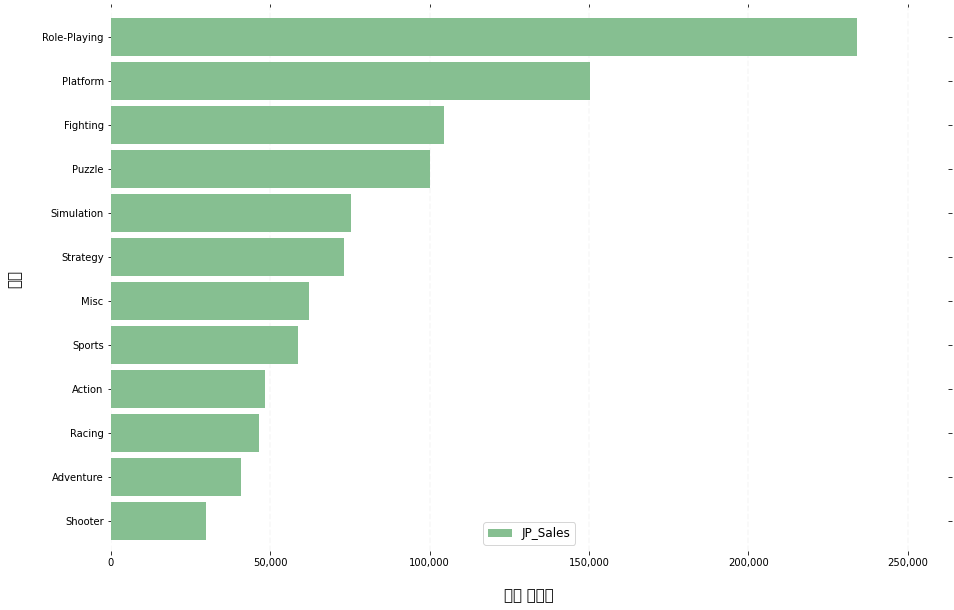

In [71]:
ax = JP.plot(kind='barh', figsize=(15, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel('일본 판매량', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Set y-axis label
ax.set_ylabel('장르', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'));
leg = ax.legend(prop={"size":12})

In [72]:
Other = pd.DataFrame(round(df.groupby('Genre')['Other_Sales'].mean()))
Other = Other.sort_values('Other_Sales', ascending = True)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 53440 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52636 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54616 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44592 missing from current font.
  font.set_

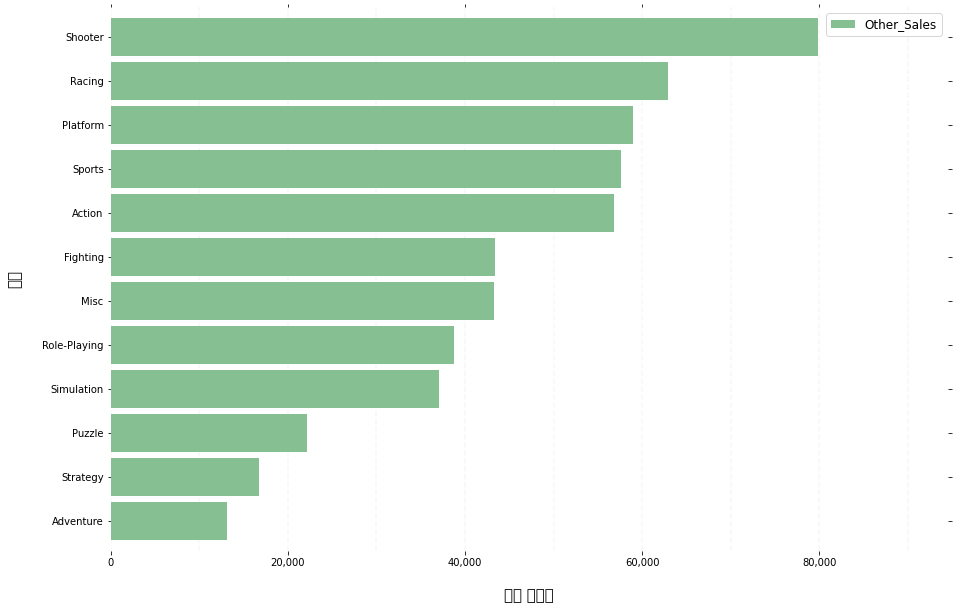

In [73]:
ax = Other.plot(kind='barh', figsize=(15, 10), color='#86bf91', zorder=2, width=0.85)

  # Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

  # Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

  # Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
      ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

  # Set x-axis label
ax.set_xlabel('기타 출하량', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Set y-axis label
ax.set_ylabel('장르', labelpad=20, weight='normal', size=20, fontsize = 15)

  # Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'));

leg = ax.legend(prop={"size":12})

####시사점1
분석 결과 북미, 유럽, 기타 지역의 판매량은 매우 유사한 패턴을 가진다.<br>
일본의 경우 platform 장르가 다른 지역과 마찬가지로 높은 선호도를 보였으나 이외에는 다른 패턴을 보이는 것을 확인하였다. 







####b. 연도별 게임의 트렌드가 있을까

In [74]:
df['total'] = df['NA_Sales'] + df['EU_Sales'] + df['JP_Sales'] + df['Other_Sales']

#####1) 시대별 장르 판매량 <br>

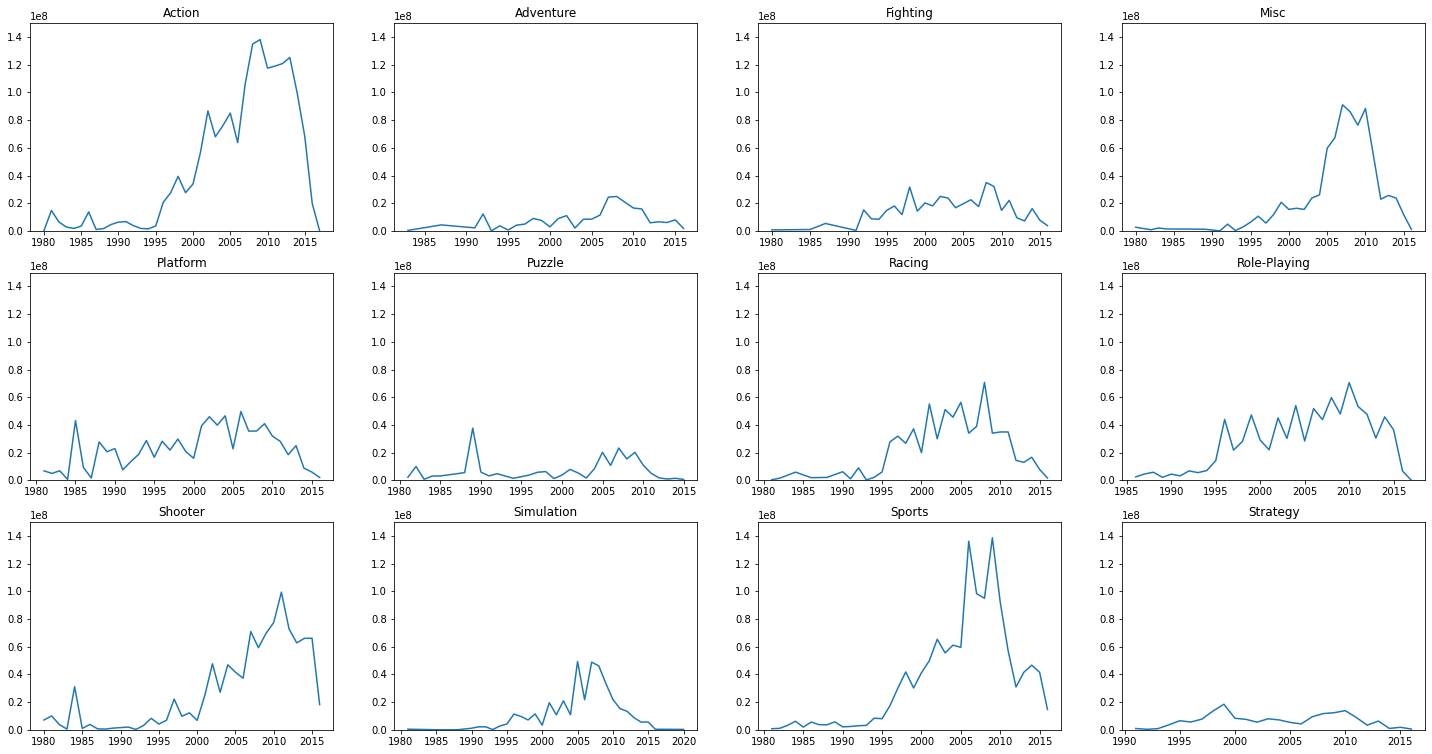

In [75]:
genre = list(df['Genre'].unique())
genre.sort()
fig2, ax2 = plt.subplots(3,4, figsize=(25,13))

for i, genre in enumerate(genre): #row 설정
    if i <= 3:
        r = 0
    elif i > 3 and i <= 7:
        r = 1
    elif i > 7 and i <= 11:
        r = 2

    j = i % 4 #column 설정

    df1 = df[df['Genre'] == genre]
    df2 = df1.groupby('Year')['total'].sum()
    ax2[r,j].plot(df2)
    ax2[r,j].set_title(genre)
    ax2[r,j].set_ylim(0,150000000)
plt.show()

####2) 연도별 1위 게임 장르 분석

In [76]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Candace Kane's Candy Factory,DS,2008,Action,Destineer,40000,0,0,0,40000
1,The Munchables,Wii,2009,Action,Namco Bandai Games,170000,0,0,10000,180000
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,Alchemist,0,0,20000,0,20000
3,Deal or No Deal: Special Edition,DS,2010,Misc,Zoo Games,40000,0,0,0,40000
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,D3Publisher,120000,90000,0,40000,250000


In [77]:
#연도별 장르 1위 값 데이터 가져오기
year_Genre = df.groupby(['Year', 'Genre'])['total'].sum().reset_index()
max_yes = year_Genre.groupby('Year')['total'].transform(max) == year_Genre['total']
year_Genre_max = year_Genre[max_yes].reset_index(drop=True)
year_Genre_max.head()

,Year,Genre,total
0,1980,Shooter,7070000
1,1981,Action,14790000
2,1982,Puzzle,10040000
3,1983,Platform,6930000
4,1984,Shooter,31100000


In [78]:
# grouped = Genre_max.groupby('Year')  #사용자 정의 함수 이용해서 최대값 가져오기 
# def peak(arr):
#   return arr.max()
# grouped.agg(peak).reset_index().head()

In [79]:
#연도별 장르합 구하기 
Genre_sum = df.groupby(['Year'])['total'].sum().reset_index()
Genre_sum .head()

,Year,total
0,1980,10880000
1,1981,35680000
2,1982,28880000
3,1983,16800000
4,1984,50350000


In [80]:
#연도별 1위 장르의 시장 점유율 
Genre_merge = pd.merge(year_Genre_max, Genre_sum, how = 'outer', on = 'Year')
Genre_merge['share']= round(Genre_merge['total_x'] / Genre_merge['total_y']*100, 2)
Genre_merge.tail()

,Year,Genre,total_x,total_y,share
34,2014,Action,99009999,337079997,29.37
35,2015,Action,68250000,261829998,26.07
36,2016,Action,19840000,70839999,28.01
37,2017,Role-Playing,40000,50000,80.00
38,2020,Simulation,290000,290000,100.00


####3)연도별 2위 게임 장르 분석 

In [81]:
#연도별 장르 2위 값을 구하기 위해 연도별 장르 1위 제외 

In [82]:
year_Genre_2 = year_Genre.drop(index = [3,   4,  14,  21,  30,  34,  39,  47,  53,  63,  68,  78,  88, 
            102, 114, 126, 141, 152, 168, 177, 192, 194, 206, 218, 230, 242,
            264, 266, 278, 300, 302, 314, 326, 338, 350, 362, 374, 386, 387], axis = 0)
year_Genre_2 = year_Genre_2.reset_index()


In [83]:
#연도별 장르 2위 값 데이터 가져오기
max_yes_2 = year_Genre_2.groupby('Year')['total'].transform(max) == year_Genre_2['total']
year_Genre_2_max = year_Genre_2[max_yes_2].reset_index(drop=True)
year_Genre_2_max.tail()

,index,Year,Genre,total
33,346,2013,Shooter,62730000
34,358,2014,Shooter,65989999
35,370,2015,Shooter,66119999
36,381,2016,Shooter,18169999
37,385,2017,Action,10000


In [84]:
#연도별 2위 장르의 시장 점유율 
Genre_merge_2 = pd.merge(year_Genre_2_max, Genre_sum, how = 'outer', on = 'Year')
Genre_merge_2['share']= round(Genre_merge_2['total_x'] / Genre_merge_2['total_y'] * 100, 2)
Genre_merge_2.tail()

,index,Year,Genre,total_x,total_y,share
34,358.0,2014,Shooter,65989999.0,337079997,19.58
35,370.0,2015,Shooter,66119999.0,261829998,25.25
36,381.0,2016,Shooter,18169999.0,70839999,25.65
37,385.0,2017,Action,10000.0,50000,20.00
38,NaN,2020,NaN,NaN,290000,NaN


In [85]:
#구글시트에서 line gragh
Genre_merge.to_csv('/content/drive/MyDrive/Data/Genre_trend.csv')

In [86]:
#구글시트에서 line gragh
Genre_merge_2.to_csv('/content/drive/MyDrive/Data/Sales.csv')

In [87]:
#2008년과 2017년 비교

In [88]:
a = df[df['Year'] == 2008]
a['Genre'].value_counts()

Action          218
Misc            208
Sports          198
Adventure       165
Simulation      117
Role-Playing    112
Shooter          82
Racing           82
Puzzle           63
Platform         62
Fighting         56
Strategy         50
Name: Genre, dtype: int64

In [89]:
a = a.reset_index(drop = True)

In [90]:
b = df[df['Year'] == 2017] 
b['Genre'].value_counts()

Role-Playing    2
Action          1
Name: Genre, dtype: int64

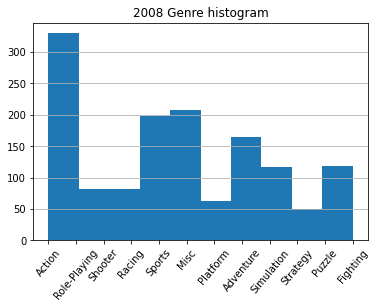

In [91]:
plt.hist(a['Genre'])
plt.title('2008 Genre histogram')
plt.grid(True,axis='y')
plt.xticks(rotation=50)
plt.show()


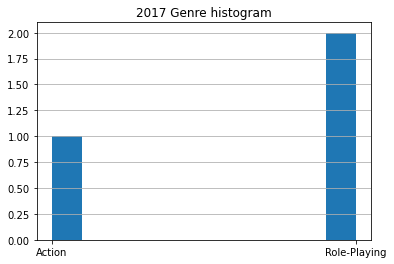

In [92]:
plt.hist(b['Genre'])
plt.title('2017 Genre histogram')
plt.grid(True,axis='y')
plt.xticks()
plt.show()


####시사점
차트의 형태로 보았을 때 80년대에 1,2위 장르가 장르 내의 거의 대부분을 점유하고 있음을 알 수 있다. 
하지만 90년대를 지나 20년대에 이르면 1,2위 장르의 합이 약 40%에도 이르지 못하는 것을 확인할 수 있다.
이는 연도별 총 판매량과 연관지어 생각해 볼 수 있습니다.
판매량에 의하면 1,2위 장르의 점유율이 낮은 해일 수록 높은 판매량을 기록했습니다. 
이는 특정 장르의 시장 점유율을 높여 독과점을 할 시, 수익성에 해가 될 수 있다는 결론을 내렸습니다.


####c. 출고량이 높은 게임에 대한 분석 및 시각화 프로세스

#####1) 1980년~2020년 전 시기 출고량

In [93]:
top_game = df.sort_values(by='total', ascending = False)
top_game.reset_index(drop=True).head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15750000,11010000,3280000,2960000,33000000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
5,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000
6,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
7,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
8,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
9,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000


In [94]:
top_game.iloc[:, [0, 1, 2, 3, 4, 9]].head(10)

,Name,Platform,Year,Genre,Publisher,total
2908,Wii Sports,Wii,2006,Sports,Nintendo,82740000
4199,Super Mario Bros.,NES,1985,Platform,Nintendo,40240000
12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,35830000
3352,Wii Sports Resort,Wii,2009,Sports,Nintendo,33000000
7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,31380000
1203,Tetris,GB,1989,Puzzle,Nintendo,30260000
6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,30010000
3014,Wii Play,Wii,2006,Misc,Nintendo,29010000
16531,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,28610000
10488,Duck Hunt,NES,1984,Shooter,Nintendo,28310000


In [95]:
x = top_game[top_game['Name'].str.contains('Mario')]
x.sort_values(by = 'Year')
x.reset_index(drop=True)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
0,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
1,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
2,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
3,New Super Mario Bros. Wii,Wii,2009,Platform,Nintendo,14590000,7060000,4700000,2260000,28610000
4,Mario Kart DS,DS,2005,Racing,Nintendo,9810000,7570000,4130000,1920000,23430000
...,...,...,...,...,...,...,...,...,...,...
107,Mario vs. Donkey Kong: Tipping Stars,3DS,2015,Puzzle,Nintendo,0,0,60000,0,60000
108,Detective Conan: Marionette Symphony,3DS,2013,Adventure,Namco Bandai Games,0,0,50000,0,50000
109,Dance Dance Revolution: Mario Mix (JP sales),GC,2005,Simulation,Nintendo,0,0,50000,0,50000
110,Mario & Luigi: Paper Jam & Mario Kart 7 Double...,3DS,2015,Misc,Nintendo,0,0,10000,0,10000


In [96]:
top_game[top_game['Name'].str.contains('Mario')]['total'].sum()

555279998

2)2008년 이전 출고량

In [97]:
df_new = df[(df['Year'] <= 2008)].reset_index()
df_new.sort_values(by = 'total', ascending = False).head(10)

,index,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,total
1718,2908,Wii Sports,Wii,2006,Sports,Nintendo,41490000,29020000,3770000,8460000,82740000
2460,4199,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
7311,12579,Mario Kart Wii,Wii,2008,Racing,Nintendo,15850000,12880000,3790000,3310000,35830000
4556,7829,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31380000
713,1203,Tetris,GB,1989,Puzzle,Nintendo,23200000,2260000,4220000,580000,30260000
4011,6937,New Super Mario Bros.,DS,2006,Platform,Nintendo,11380000,9230000,6500000,2900000,30010000
1784,3014,Wii Play,Wii,2006,Misc,Nintendo,14030000,9200000,2930000,2850000,29010000
6113,10488,Duck Hunt,NES,1984,Shooter,Nintendo,26930000,630000,280000,470000,28310000
6497,11137,Nintendogs,DS,2005,Simulation,Nintendo,9070000,11000000,1930000,2750000,24750000
6208,10650,Mario Kart DS,DS,2005,Racing,Nintendo,9810000,7570000,4130000,1920000,23430000


In [98]:
#구글시트에서 line gragh
top_game.to_csv('/content/drive/MyDrive/Data/top_game.csv')

####d. 지역에 따른 선호도 차이


In [103]:
group = df.groupby('Genre')
f_exp_Global = [group['total'].sum()[x]/(group['total'].sum()).sum()
for x in range(0,len(group))]  # 전세계(Global)출고량중 장르별 출고량 비율

In [104]:
group = df.groupby('Genre')
f_obs_JP = [group['JP_Sales'].sum()[x]/(group['JP_Sales'].sum()).sum() for x in range(0,len(group))] # 일본지역(JP) 출고량 중 장르별 출고량 비중
print('statistic:',stats.chisquare(f_obs_JP,f_exp_G)[0])
print('p-value:',stats.chisquare(f_obs_JP,f_exp_G)[1])

statistic: 0.43478661938118235
p-value: 0.9999993454737552


In [105]:
group = df.groupby('Genre')
f_obs_NA = [group['NA_Sales'].sum()[x]/(group['NA_Sales'].sum()).sum() for x in range(0,len(group))] # 미국(NA) 출고량 중 장르별 출고량 비중
print('statistic:',stats.chisquare(f_obs_NA,f_exp_G)[0])
print('p-value:',stats.chisquare(f_obs_NA,f_exp_G)[1])

statistic: 0.012918097705625712
p-value: 0.9999999999999969


In [106]:
group = df.groupby('Genre')
f_obs_EU = [group['NA_Sales'].sum()[x]/(group['EU_Sales'].sum()).sum() for x in range(0,len(group))] # 일본지역(JP) 출고량 중 장르별 출고량 비중
print('statistic:',stats.chisquare(f_obs_EU,f_exp_G)[0])
print('p-value:',stats.chisquare(f_obs_EU,f_exp_G)[1])

statistic: 0.6800693339032421
p-value: 0.9999930873249921


시사점 : 지역에 따라 선호하는 게임 장르의 차이가 없다. 